## Car Price Prediction-ML Case Study##

**Problem Statement** <br>

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

**Business Goal**

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.
 


**Step1:Reading and Understanding the Data**

In [1]:
#importing the reqiuired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

In [2]:
path=r'C:\Users\Hp\Desktop\ML Assignement'

In [3]:
car_df=pd.read_csv(path+'\CarPrice_Assignment.csv')
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#shape of the df
car_df.shape

(205, 26)

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#describing the df to check the statiscal values
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
#checking if there is any null values in the df
car_df.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

**As per above it seems there is no null values in the data set** <br>
**Step2: Preparation of Data**


In [8]:
#car_ID doesnt seem to be useful as per Data Dictionary , hence froping the same
car_df=car_df.drop(['car_ID'],axis=1)

**As per problem statement CarName has Company name and the model Name, so we have to consider only company Name as independent variable** 

In [9]:
car_df['CompanyName'] = car_df['CarName'].apply(lambda x : x.split(' ')[0])
car_df=car_df.drop(['CarName'] ,axis=1)

In [10]:
car_df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Changing the Company Name as there are some spelling errors and abbreviations**<br>
1.maxda-mazda<br>
2.Nissan-nissan<br>
3.porcshce-porsche<br>
4.toyouta-toyota<br>
5.vokswagen-volkswagen<br>
6.vw-volkswagen<br>

In [11]:
car_df['CompanyName']=car_df['CompanyName'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota','vokswagen':'volkswagen','vw':'volkswagen'})

In [12]:
car_df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

**Now converting other categorical variables in numeric form**

In [13]:
car_df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CompanyName'],
      dtype='object')

In [14]:
car_df['doornumber'].unique()


array(['two', 'four'], dtype=object)

In [15]:
car_df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [16]:
car_df['doornumber']=car_df['doornumber'].replace({'two': '2', 'four': '4'})

In [17]:
car_df['cylindernumber']=car_df['cylindernumber'].replace({'four': '4', 'six': '6','five':'5','three':'3','twelve':'12','two':'2','eight':'8'})

In [18]:
car_df['cylindernumber'].unique()

array(['4', '6', '5', '3', '12', '2', '8'], dtype=object)

In [19]:
car_df['doornumber'].unique()

array(['2', '4'], dtype=object)

### Step3: Visualising the Data ###

Performing the Data Understanding Step to ckeck :
1.If there is any multicollinearity between the predictors 
2.which variables are having strong relationship with car price


**As the price is the dependent varaible we will visualise the Price variable**

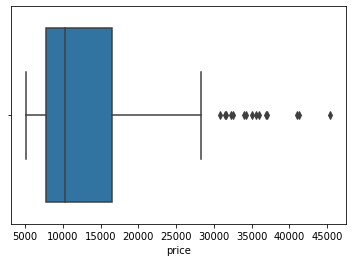

In [20]:
plt.figure()
sns.boxplot(car_df['price'])
plt.show()

In [21]:
car_df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

**As per the graph and data it shows that <br>
1.max price of Car goes upto 45000 and min price to 5000 .<br>
2.Also the mean and median slightly differs from each other .<br>
3 The data is completely spread from min to max values where there is huge jum of price from 3rd quartile**<br>


In [22]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1


### Visualising the Categorical Data ###



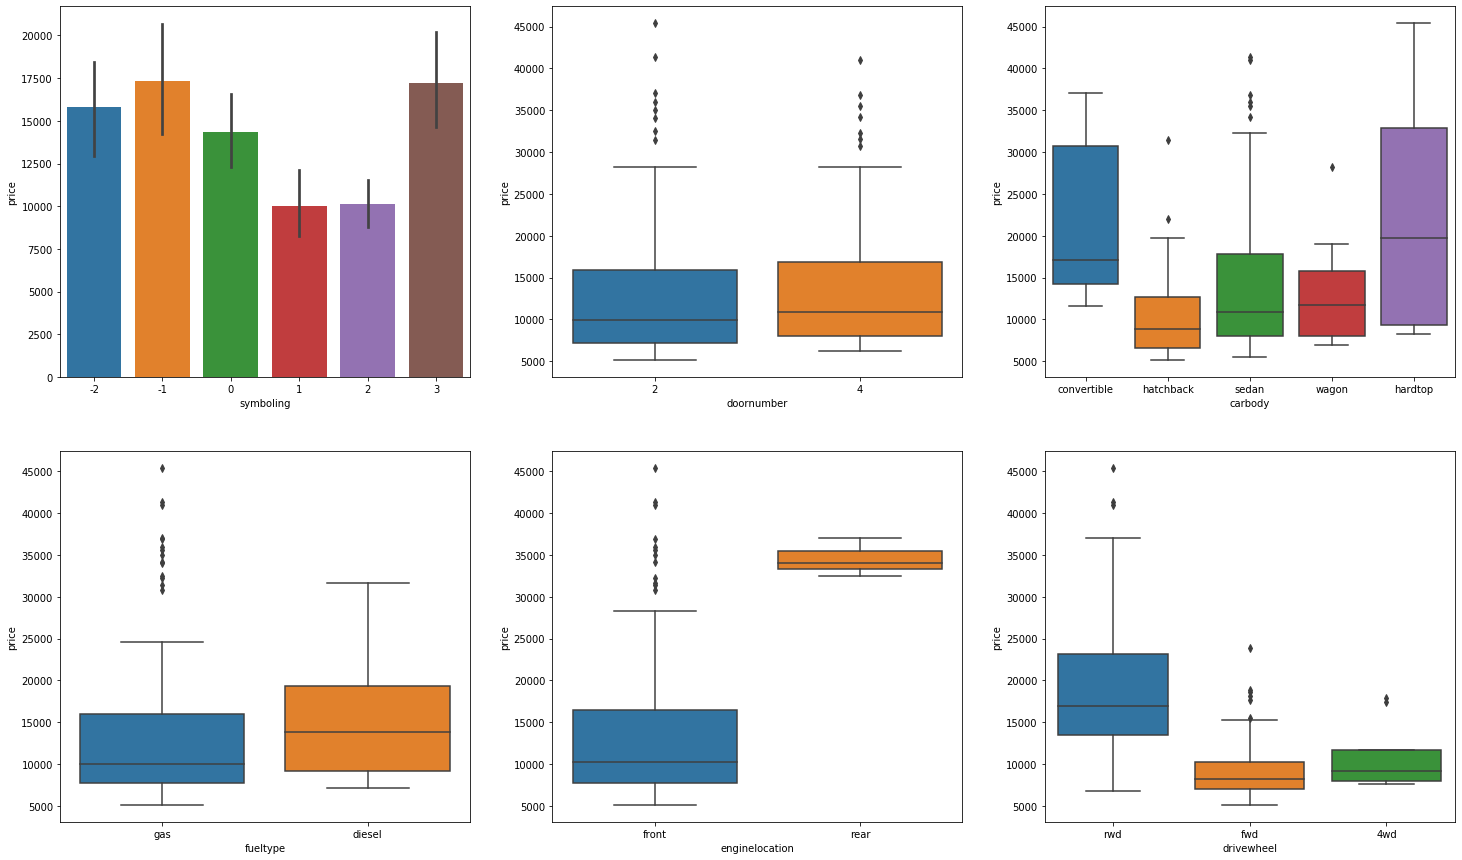

In [23]:
plt.figure(figsize=(25, 15))
plt.subplot(2,3,1)
sns.barplot(x='symboling', y='price', data= car_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'doornumber', y = 'price', data = car_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = car_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'fueltype', y = 'price', data = car_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_df)
plt.show()


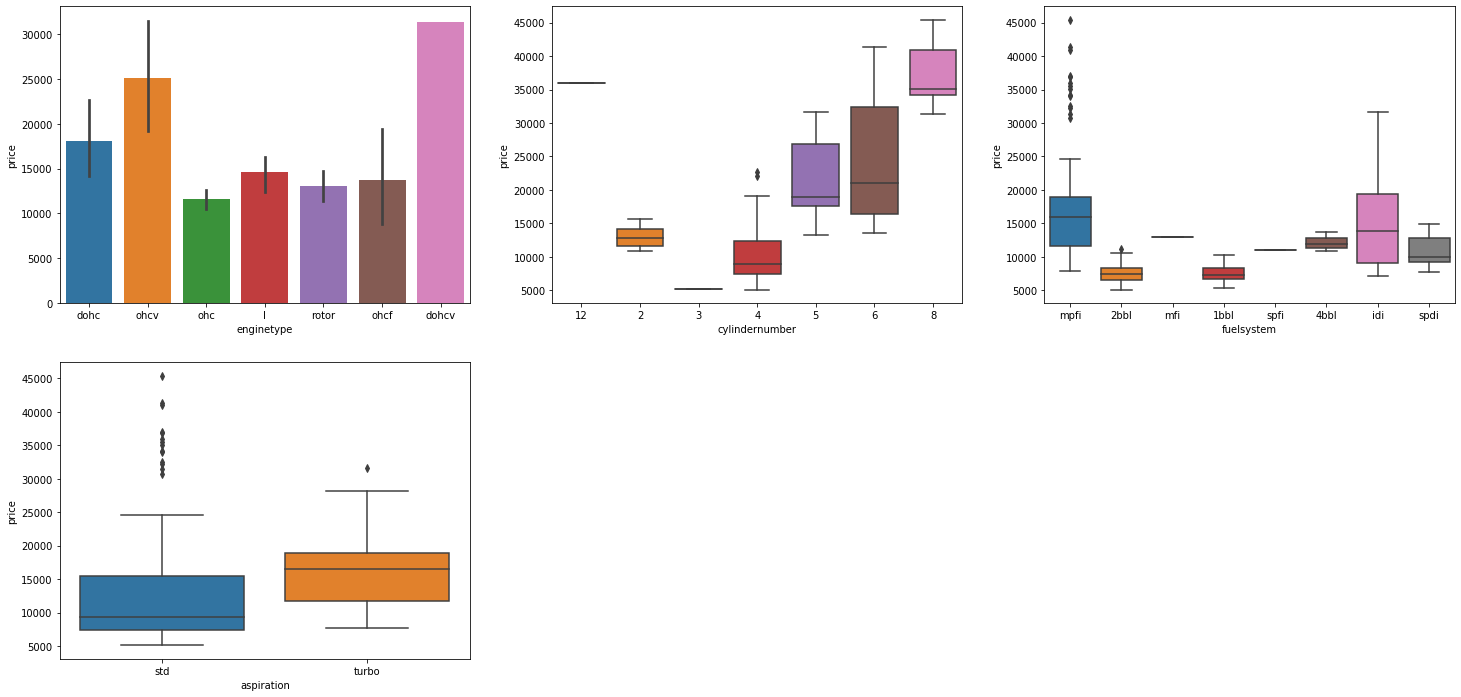

In [24]:
plt.figure(figsize=(25, 12))
plt.subplot(2,3,1)
sns.barplot(x='enginetype', y='price', data= car_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car_df)
plt.show()

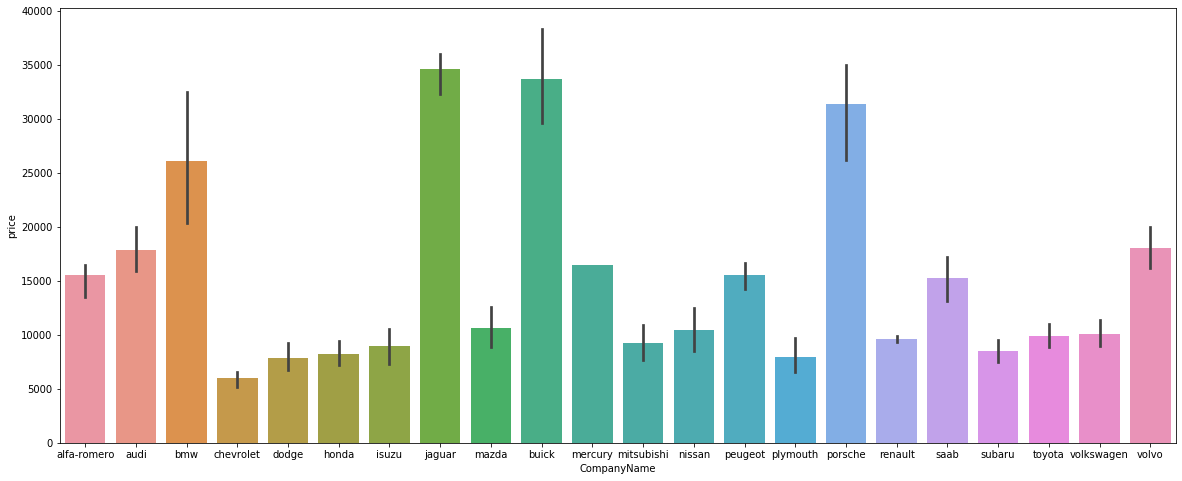

In [25]:
plt.figure(figsize=(20,8))
sns.barplot(x='CompanyName', y='price', data=car_df)
plt.show()

### Inferences ###
*_As per the above graphs below are the inferences_*

- Car having the high risk rating(+3) are higher in price and with lower risk rating of -1 is also high in price
- Price range of the cars with 2 and 4 door number are almost similar.Median also differs very slightly.2 Door car has some data which shows high price value till 45000
- Carbody has a lot variations in the data Starting price for convertible cars is quite high.Hatch back , sedan and wagon has almost same starting price .hardtop has the equal lower price and higher price range
- For fuel type gas type has the large variation in prices where as diesal fuel type has equal lower and higher range
- Engine location has very large differnce in the prices.It seems that front engine type has a distribution from lower price o higher price whereas rear engine lies in higher price range only.
- In wheeltype , rear wheel type(rwd) has a variation in price from lower to higher but front wheel(fwd) and 4 wheel (4wd) has lesser variations in prices ,Infact from data it seems highers prices are not available.
- EngineType , dohc has higher price ranges
- Cylinder Number has different variation for differnt type.8 cylinder majorly lies in higher range and 2,3,4 cylinder type lies from low to medium range
- For fuel system mpfi has the variation in prices ranging from low to very high
- Aspiration with standard type has lot of variation in the price .Comapred to turbo type the price range differs from lower to higher and as well the median also quite difefrnt from each other
- Also the cars such as Jaguar, buick , porsche is the very high range cars .Also Bmw comes in high range cars

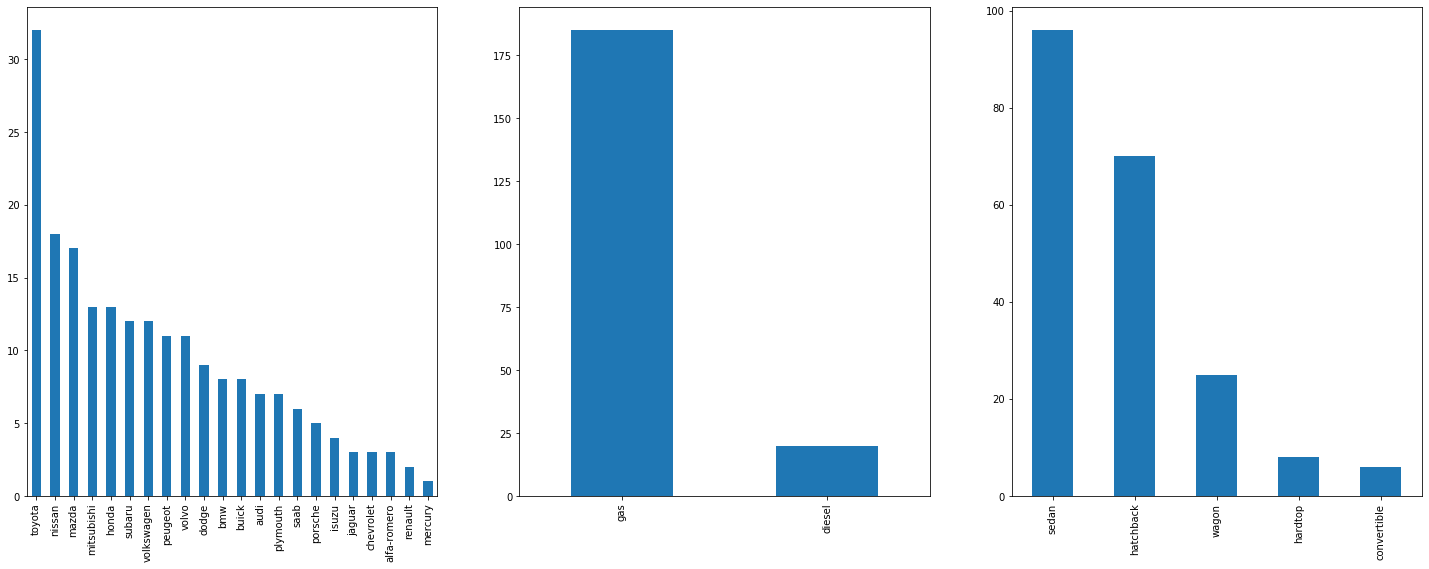

In [26]:
plt.figure(figsize=(25,9))
plt.subplot(1,3,1)
car_df['CompanyName'].value_counts().plot(kind='bar')
plt.subplot(1,3,2)
car_df['fueltype'].value_counts().plot(kind='bar')
plt.subplot(1,3,3)
car_df['carbody'].value_counts().plot(kind='bar')
plt.show()

**From the above graphs it seems that Toyota is the most selling cars , gas fuel is the most selling cars .
And most preferred car types are sedan and hatchback**

### Visualising the numerical variables ###

<Figure size 1440x1296 with 0 Axes>

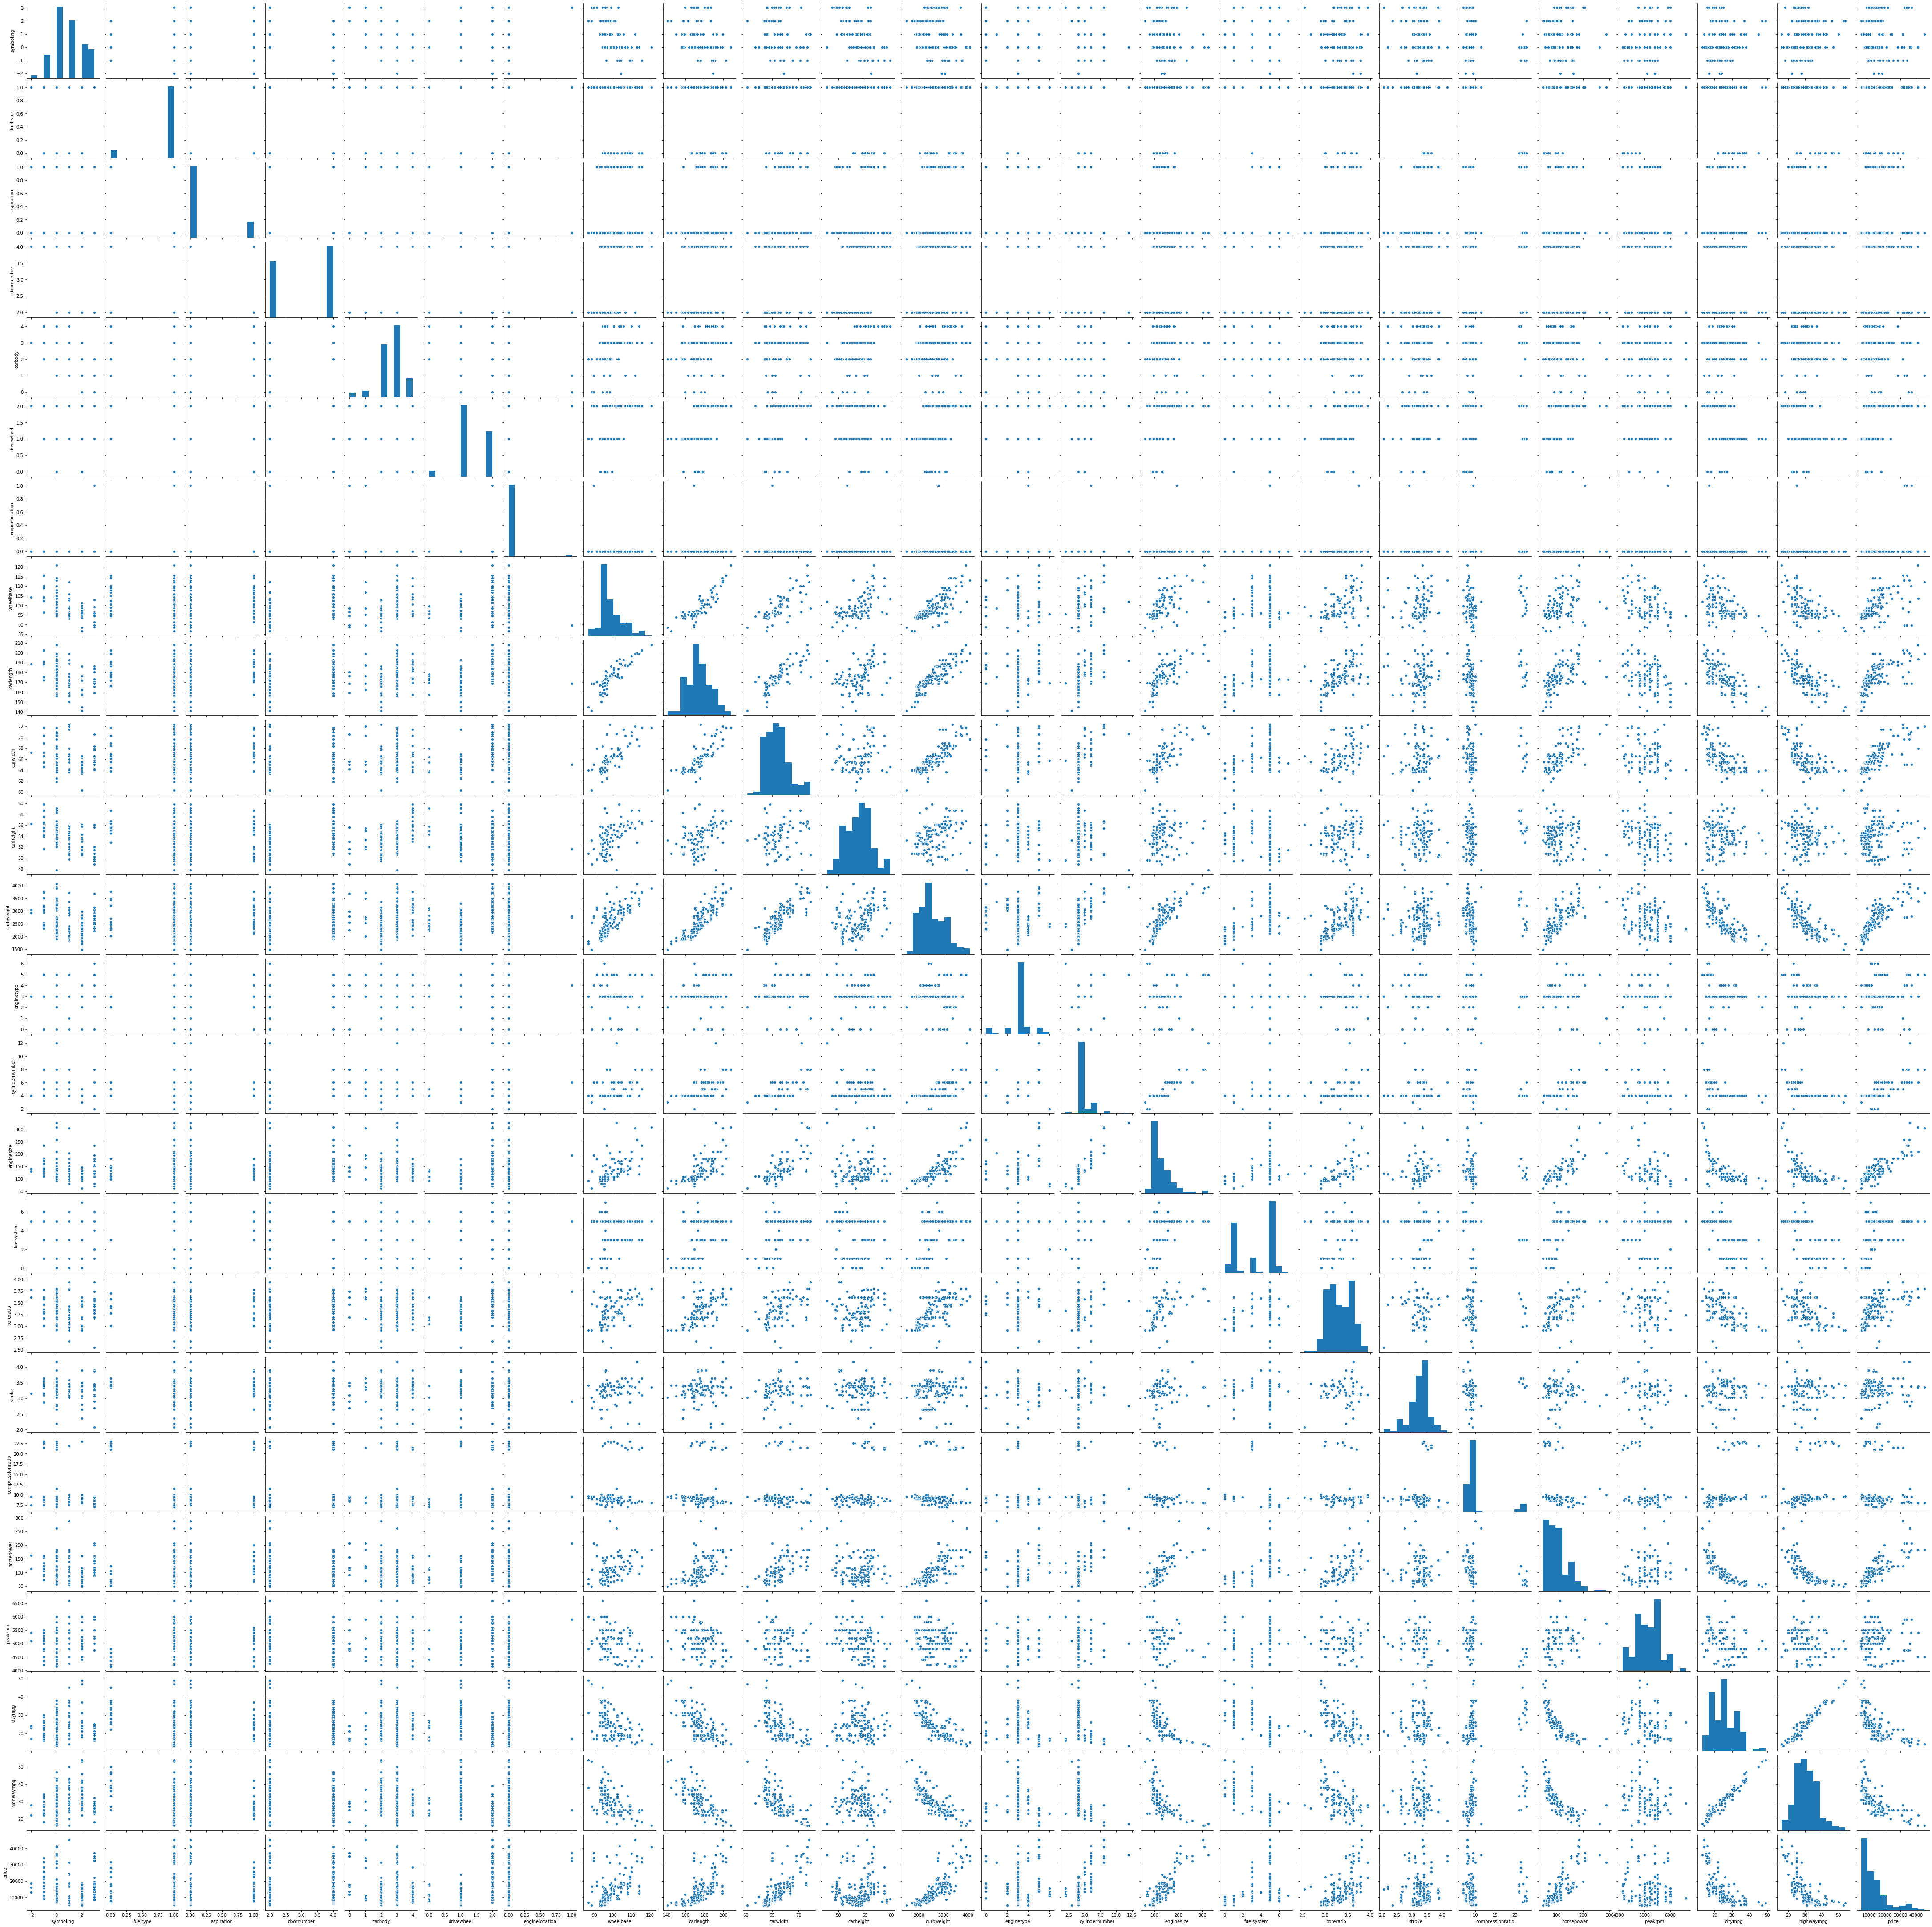

In [102]:
plt.figure(figsize=(20,18))
sns.pairplot(car_df)
plt.show()

#### As the above graph is not seems to be much understandable , plotting the numerical variables seperately ####

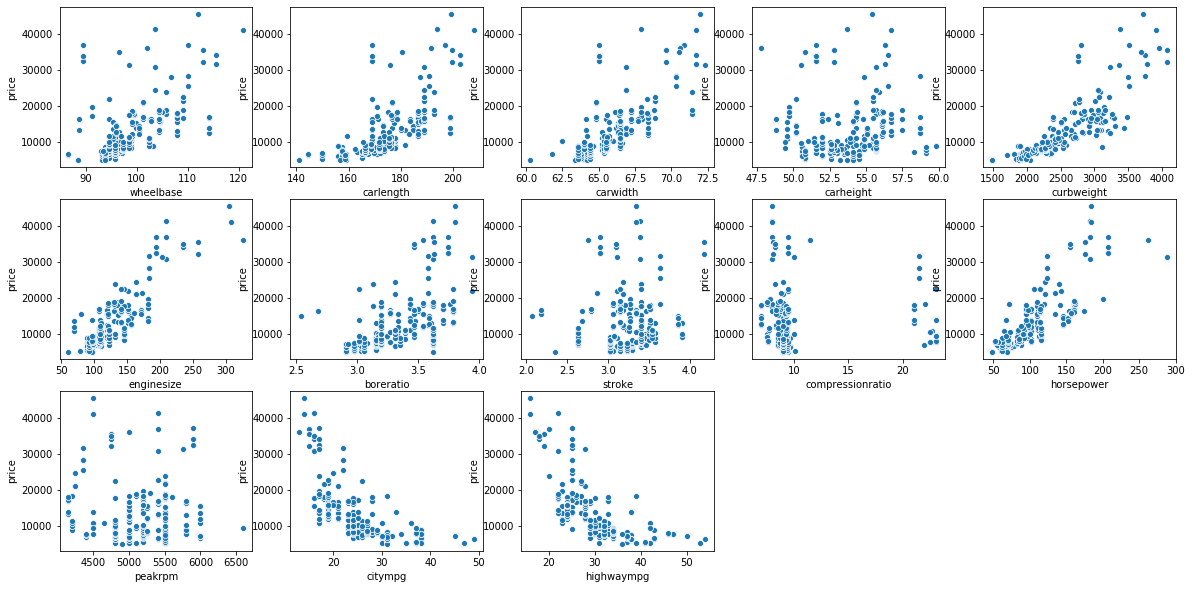

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(3,5,1)
sns.scatterplot(x='wheelbase', y='price', data= car_df)
plt.subplot(3,5,2)
sns.scatterplot(x = 'carlength', y = 'price', data = car_df)
plt.subplot(3,5,3)
sns.scatterplot(x = 'carwidth', y = 'price', data = car_df)
plt.subplot(3,5,4)
sns.scatterplot(x = 'carheight', y = 'price', data = car_df)
plt.subplot(3,5,5)
sns.scatterplot(x = 'curbweight', y = 'price', data = car_df)
plt.subplot(3,5,6)
sns.scatterplot(x = 'enginesize', y = 'price', data = car_df)
plt.subplot(3,5,7)
sns.scatterplot(x = 'boreratio', y = 'price', data = car_df)
plt.subplot(3,5,8)
sns.scatterplot(x = 'stroke', y = 'price', data = car_df)
plt.subplot(3,5,9)
sns.scatterplot(x = 'compressionratio', y = 'price', data = car_df)
plt.subplot(3,5,10)
sns.scatterplot(x = 'horsepower', y = 'price', data = car_df)
plt.subplot(3,5,11)
sns.scatterplot(x = 'peakrpm', y = 'price', data = car_df)
plt.subplot(3,5,12)
sns.scatterplot(x = 'citympg', y = 'price', data = car_df)
plt.subplot(3,5,13)
sns.scatterplot(x = 'highwaympg', y = 'price', data = car_df)
plt.show()

*_From the above graphs it infers that 
most of the  independent vraiable are positively correlated with price and citympg ,highwaympg has negative correlation with price_*


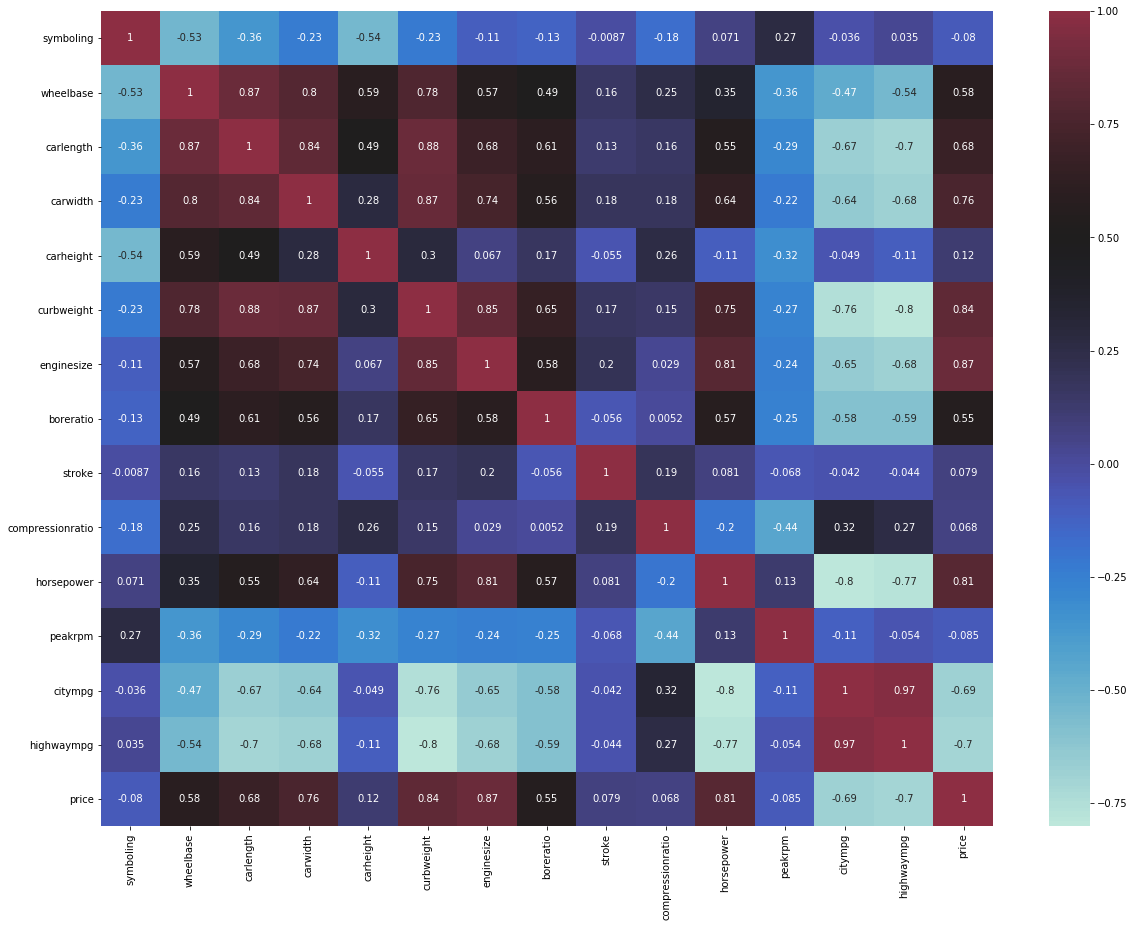

In [29]:
plt.figure(figsize=(20,15))
sns.heatmap(car_df.corr(), annot=True, center=0.5)

**Now as seen in the heat map , negative correlation and positive correlation are clearly shown.Enginesize , carlength , carwidth , curbweight are highly correlated with price , which shows the multicollineraity between the variables**

### Converting the Categorical Variable into Dummy Variable ###

In [30]:
le = LabelEncoder()

In [31]:
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [32]:
car_df['fueltype']= le.fit_transform(car_df['fueltype']) 
car_df['aspiration']=le.fit_transform(car_df['aspiration']) 
car_df['carbody']=le.fit_transform(car_df['carbody']) 
car_df['drivewheel']=le.fit_transform(car_df['drivewheel']) 
car_df['enginelocation']=le.fit_transform(car_df['enginelocation'])
car_df['enginetype']=le.fit_transform(car_df['enginetype'])
car_df['fuelsystem']=le.fit_transform(car_df['fuelsystem'])
car_df.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,0,2,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,0,4,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,0,4,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [33]:
#Dropping the CompanyName Coloumn as it is a categorical data na d cannot be converted into Dummies
car_df=car_df.drop(['CompanyName'],axis=1)

In [34]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int32  
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

In [35]:
car_df['doornumber']=car_df['doornumber'].astype(int)
car_df['cylindernumber']=car_df['cylindernumber'].astype(int)

In [36]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int32  
 13  cylindernumber    205 non-null    int32  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

## Step-4:Train and Test split Data ##

In [37]:
np.random.seed(0)
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
#Scaling all the numeric data except Dummy variables so that everything comes in same scale
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio','stroke','horsepower',
            'peakrpm','compressionratio','citympg','highwaympg','carlength','carwidth','carheight','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,1,1,0,4,3,1,0,0.244828,0.426016,0.291667,...,0.139623,1,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818
125,3,1,0,2,2,2,0,0.272414,0.452033,0.666667,...,0.339623,5,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890
166,1,1,0,2,2,2,0,0.272414,0.448780,0.308333,...,0.139623,5,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110
1,3,1,0,2,0,2,0,0.068966,0.450407,0.316667,...,0.260377,5,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446
199,-1,1,1,4,4,2,0,0.610345,0.775610,0.575000,...,0.260377,5,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131


In [39]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.797203,0.909091,0.181818,3.118881,2.664336,1.293706,0.006993,0.411141,0.525476,0.461655,...,0.241351,3.118881,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310
std,1.195999,0.288490,0.387050,0.996399,0.838712,0.567080,0.083624,0.205581,0.204848,0.184517,...,0.154619,2.019237,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682
min,-2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.272414,0.399187,0.304167,...,0.135849,1.000000,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298
50%,1.000000,1.000000,0.000000,4.000000,3.000000,1.000000,0.000000,0.341379,0.502439,0.425000,...,0.184906,3.000000,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343
75%,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,0.000000,0.503448,0.669919,0.550000,...,0.301887,5.000000,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479
max,3.000000,1.000000,1.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step5 - Modeling -Dividing into X and Y sets for the model building 

In [40]:
#Defining x and y 
y_train = df_train.pop('price')
X_train = df_train

In [41]:
#Using RFE checking the top 10 variables 
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)            
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 11),
 ('fueltype', False, 2),
 ('aspiration', False, 10),
 ('doornumber', False, 14),
 ('carbody', False, 9),
 ('drivewheel', False, 6),
 ('enginelocation', True, 1),
 ('wheelbase', False, 7),
 ('carlength', False, 4),
 ('carwidth', True, 1),
 ('carheight', False, 5),
 ('curbweight', True, 1),
 ('enginetype', False, 8),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('fuelsystem', False, 12),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 13),
 ('horsepower', True, 1),
 ('peakrpm', False, 3),
 ('citympg', True, 1),
 ('highwaympg', True, 1)]

In [43]:
#Column which support RFE 
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'citympg',
       'highwaympg'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'wheelbase', 'carlength', 'carheight', 'enginetype',
       'fuelsystem', 'compressionratio', 'peakrpm'],
      dtype='object')

## Building model using statsmodel, for the detailed statistic

In [45]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,enginelocation,carwidth,curbweight,cylindernumber,enginesize,boreratio,stroke,horsepower,citympg,highwaympg
122,0,0.291667,0.272692,4,0.139623,0.230159,0.525253,0.083333,0.500000,0.567568
125,0,0.666667,0.500388,4,0.339623,1.000000,0.464646,0.395833,0.166667,0.270270
166,0,0.308333,0.314973,4,0.139623,0.444444,0.449495,0.266667,0.361111,0.324324
1,0,0.316667,0.411171,4,0.260377,0.626984,0.247475,0.262500,0.222222,0.270270
199,0,0.575000,0.647401,4,0.260377,0.746032,0.484848,0.475000,0.111111,0.135135


In [46]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
lm = sm.OLS(y_train,X_train_rfe).fit()

_Model1_

In [48]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     82.74
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.14e-52
Time:                        11:32:24   Log-Likelihood:                 158.77
No. Observations:                 143   AIC:                            -295.5
Df Residuals:                     132   BIC:                            -263.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2620      0.126      2.

In [72]:
#Since citympg has high p value so it need to be dropped , one by one
X_train_new1 = X_train_rfe.drop(["citympg"], axis = 1)

In [73]:
#Recreating the model
X_train_m2 = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_m2).fit()

_Model 2_

In [51]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     92.57
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.47e-53
Time:                        11:32:25   Log-Likelihood:                 158.73
No. Observations:                 143   AIC:                            -297.5
Df Residuals:                     133   BIC:                            -267.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2596      0.126      2.

In [74]:
#Since highwaympg has very high p value , hence dropping the same
X_train_new2 = X_train_m2.drop(['highwaympg'], axis=1)

In [75]:
#Recreating a new model
X_train_m3 = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_m3).fit()

_model3_

In [54]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     104.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.18e-53
Time:                        11:32:25   Log-Likelihood:                 158.18
No. Observations:                 143   AIC:                            -298.4
Df Residuals:                     134   BIC:                            -271.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2811      0.124      2.

In [77]:
#Now curbweight p vald is high so dropping the same
X_train_new3 = X_train_m3.drop(['curbweight'], axis=1)

In [78]:
#Recreating the model again
X_train_m4 = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train,X_train_m4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     117.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.02e-54
Time:                        11:43:01   Log-Likelihood:                 157.04
No. Observations:                 143   AIC:                            -298.1
Df Residuals:                     135   BIC:                            -274.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3570      0.113      3.

In [79]:
#Now calculating the VIF and then further build the model
vif = pd.DataFrame()
X = X_train_m4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,264.35
4,enginesize,20.51
3,cylindernumber,13.06
5,boreratio,5.43
7,horsepower,3.50
2,carwidth,3.00
6,stroke,2.79
1,enginelocation,1.16


In [80]:
#Since the VIF of enginesize is very high hence removing the same.
X_train_new4 = X_train_m4.drop(['enginesize'], axis=1)

_Model-5_

In [81]:
#Model 5
X_train_m5 = sm.add_constant(X_train_new4)
lm = sm.OLS(y_train,X_train_m5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     93.66
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.92e-46
Time:                        11:43:50   Log-Likelihood:                 133.88
No. Observations:                 143   AIC:                            -253.8
Df Residuals:                     136   BIC:                            -233.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3628      0.061     -5.

In [60]:
#Now Checking the VIF 
vif = pd.DataFrame()
X = X_train_m5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.24
6,horsepower,3.47
2,carwidth,2.96
3,cylindernumber,2.60
4,boreratio,2.25
5,stroke,1.33
1,enginelocation,1.15


**As per the above data it VIF looks which is less than 5.Also the R2 is 80% and adj R2 is 79.7% which also looks pretty good
but p value of boreratio  and stroke , is little high.<br>
But after checking the value of VIF , dropping boreratio first**


In [82]:
X_train_new5 = X_train_m5.drop(['boreratio'], axis=1)

_Model-6_

In [83]:
#Model-6
X_train_m6 = sm.add_constant(X_train_new5)
lm = sm.OLS(y_train,X_train_m6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     111.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.05e-46
Time:                        11:47:02   Log-Likelihood:                 132.76
No. Observations:                 143   AIC:                            -253.5
Df Residuals:                     137   BIC:                            -235.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3066      0.048     -6.

In [85]:
vif = pd.DataFrame()
X = X_train_m6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,34.01
5,horsepower,3.01
2,carwidth,2.14
3,cylindernumber,2.12
1,enginelocation,1.13
4,stroke,1.09


*After checking the p value of stroke its very high so have to drop it*

In [87]:
X_train_new6 = X_train_m6.drop(['stroke'], axis=1)

*Model-7*

In [88]:
#Model-7
X_train_m7 = sm.add_constant(X_train_new6)
lm = sm.OLS(y_train,X_train_m7).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     139.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.81e-47
Time:                        11:53:35   Log-Likelihood:                 132.65
No. Observations:                 143   AIC:                            -255.3
Df Residuals:                     138   BIC:                            -240.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2937      0.039     -7.

In [ ]:
#Checking the VIF

In [91]:
vif = pd.DataFrame()
X = X_train_m7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.43
4,horsepower,3.01
3,cylindernumber,2.09
2,carwidth,2.04
1,enginelocation,1.13


**Now the above model looks pretty goog with R-square 80% and Adjusted R-Square 79.6% , F stat is in acceptable range , P value is also in accepatble range , VIF is less than 5 for all independent variable , so now W can use theis model doe Residual analysis**

### Step-6 Residual Analysis

In [92]:
y_train_price = lm.predict(X_train_m7)


Text(0.5, 0, 'Errors')

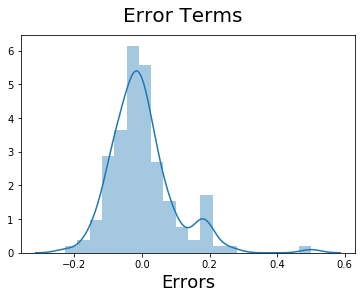

In [93]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18) 

**As per above graphs error terms looks normally distributed **

### Step-7 Predictions

In [63]:
#Scaling the test data
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio','stroke','horsepower',
            'peakrpm','compressionratio','citympg','highwaympg','carlength','carwidth','carheight','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [64]:
y_test = df_test.pop('price')
X_test = df_test

In [94]:
X_train_m7 = X_train_m7.drop('const',axis=1)

In [95]:
X_test_new = X_test[X_train_m7.columns]

In [96]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [97]:
y_pred = lm.predict(X_test_new)

### Step-8 Evaluation

Text(0, 0.5, 'y_pred')

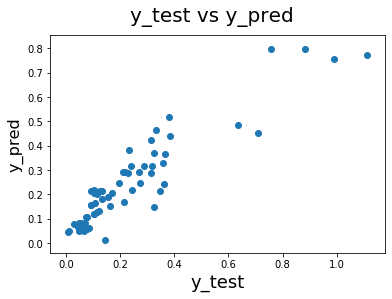

In [101]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('y_pred', fontsize=16)  

*The above graph shows the linear relationship between Y test and Y pred data*

In [99]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8368204248622794

In [100]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     139.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.81e-47
Time:                        12:10:40   Log-Likelihood:                 132.65
No. Observations:                 143   AIC:                            -255.3
Df Residuals:                     138   BIC:                            -240.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2937      0.039     -7.

#### Analysis<br>
- Above model is Quite good ,R-Sqaured 80.2% and Adjusted Square 79.6%  is pretty good 
- F stat 139.5 and Prob F stat 1.81e-47 is a good fit , which explains that model fit is not by Chance
- P Value of independent variables is below .05 and VIF is low which explains there is not much of multicollineratity between the variables
- Equation of our best fitted line is <br>
𝑝𝑟𝑖𝑐𝑒 = 0.3992×enginelocation+0.5821×carwidth+0.0349×cylindernumber𝑠+0.3863×horsepower
- Also as per the heat map and and univariate Analysis Horsepower was highly correlated and effect of the same is shown in the model
- Carwidth , enginelocation , cylindernumber will have the effect on price.
- From the above we can also say that the company can add new features such as carbody/enginetype , carwidth/enginesize etc.